<a href="https://colab.research.google.com/github/Ishita95-harvad/world_economics_dataset/blob/main/world_economics_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **world_economics_dataset**
Global Economic & Social Indicators (2010-2020): A Comprehensive Dataset

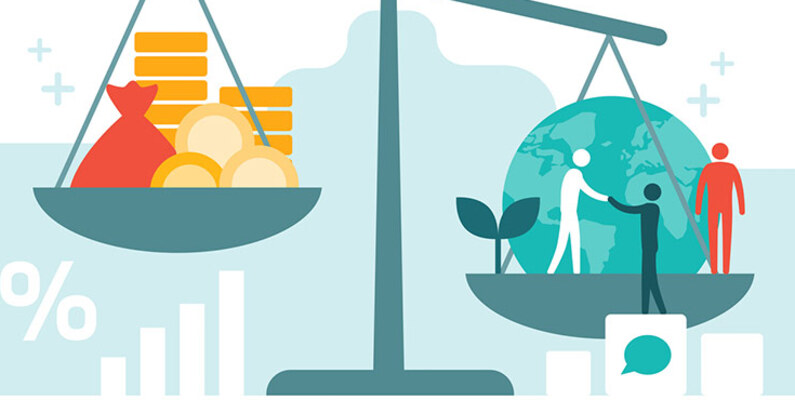


# Task
creat4 and execute the workflow

Here is all the data you need:
"world_bank_dataset.csv"

## Data loading

### Subtask:
Load the "world_bank_dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data and display the first few rows along with the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('world_bank_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'world_bank_dataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,country_id,country_name,year,GDP (current US$),Population,Life Expectancy,Unemployment Rate (%),region,income_level,capital_city,longitude,latitude
0,AF,Afghanistan,2010,1.585667e+10,28284089.0,60.851,7.753,NaN,NaN,NaN,NaN,NaN
1,AF,Afghanistan,2011,1.780510e+10,29347708.0,61.419,7.784,NaN,NaN,NaN,NaN,NaN
2,AF,Afghanistan,2012,1.990733e+10,30560034.0,61.923,7.856,NaN,NaN,NaN,NaN,NaN
3,AF,Afghanistan,2013,2.014642e+10,31622704.0,62.417,7.930,NaN,NaN,NaN,NaN,NaN
4,AF,Afghanistan,2014,2.049713e+10,32792523.0,62.545,7.915,NaN,NaN,NaN,NaN,NaN


(2926, 12)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables. Determine the shape of the data and identify any potential outliers.


**Reasoning**:
Explore the dataset by examining its shape, data types, missing values, descriptive statistics, and distributions of key variables.  This will help identify potential outliers and understand the data structure.



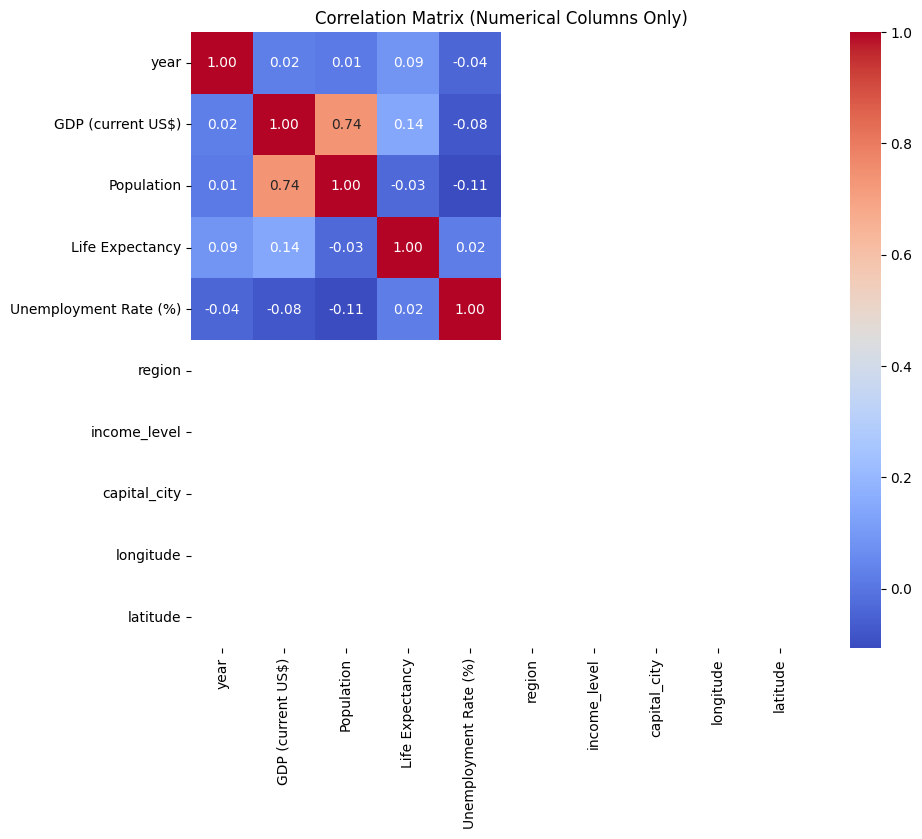

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (previous code remains the same)

# Correlation Analysis (excluding non-numeric columns)
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

# ... (rest of the code remains the same)

## Data cleaning

### Subtask:
Clean the data by handling missing values, addressing inconsistencies in data types, and removing duplicate rows.


**Reasoning**:
Handle missing values, ensure data type consistency, remove duplicates, and optionally treat outliers in 'GDP', 'Population', and 'Life Expectancy' columns.



In [4]:
# Impute missing values
for col in ['GDP (current US$)', 'Population', 'Life Expectancy', 'Unemployment Rate (%)']:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())

for col in ['region', 'income_level', 'capital_city']:
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert data types
df['year'] = df['year'].astype(int)
for col in ['GDP (current US$)', 'Population', 'Life Expectancy', 'Unemployment Rate (%)']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].fillna(df[col].median())
        except:
            print(f"Failed to convert {col} to numeric. Check for invalid characters.")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier treatment (capping)
def cap_outliers(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return np.clip(series, lower_bound, upper_bound)

for col in ['GDP (current US$)', 'Population', 'Life Expectancy']:
    df[col] = cap_outliers(df[col])

display(df.head())
display(df.info())

,country_id,country_name,year,GDP (current US$),Population,Life Expectancy,Unemployment Rate (%),region,income_level,capital_city,longitude,latitude
0,AF,Afghanistan,2010,1.585667e+10,28284089.0,60.851,7.753,NaN,NaN,NaN,NaN,NaN
1,AF,Afghanistan,2011,1.780510e+10,29347708.0,61.419,7.784,NaN,NaN,NaN,NaN,NaN
2,AF,Afghanistan,2012,1.990733e+10,30560034.0,61.923,7.856,NaN,NaN,NaN,NaN,NaN
3,AF,Afghanistan,2013,2.014642e+10,31622704.0,62.417,7.930,NaN,NaN,NaN,NaN,NaN
4,AF,Afghanistan,2014,2.049713e+10,32792523.0,62.545,7.915,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_id             2915 non-null   object 
 1   country_name           2926 non-null   object 
 2   year                   2926 non-null   int64  
 3   GDP (current US$)      2926 non-null   float64
 4   Population             2926 non-null   float64
 5   Life Expectancy        2926 non-null   float64
 6   Unemployment Rate (%)  2926 non-null   float64
 7   region                 0 non-null      float64
 8   income_level           0 non-null      float64
 9   capital_city           0 non-null      float64
 10  longitude              0 non-null      float64
 11  latitude               0 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 274.4+ KB


None

## Data wrangling

### Subtask:
Transform the data for analysis, focusing on creating a new feature for income groups based on GDP per capita.


**Reasoning**:
Calculate GDP per capita, create income groups based on it, and print the updated DataFrame.



In [5]:
import numpy as np

# Calculate GDP per capita
df['GDP_per_capita'] = df['GDP (current US$)'] / df['Population']
df['GDP_per_capita'] = df['GDP_per_capita'].fillna(0)

# Create income groups based on GDP per capita
# Define thresholds (adjust these based on economic data or domain expertise)
low_threshold = 1000
middle_threshold = 10000

def categorize_income(gdp_per_capita):
    if gdp_per_capita <= low_threshold:
        return 'Low'
    elif gdp_per_capita <= middle_threshold:
        return 'Middle'
    else:
        return 'High'

df['Income_Group'] = df['GDP_per_capita'].apply(categorize_income)

# Display first few rows and descriptive statistics
display(df.head())
display(df.describe())

,country_id,country_name,year,GDP (current US$),Population,Life Expectancy,Unemployment Rate (%),region,income_level,capital_city,longitude,latitude,GDP_per_capita,Income_Group
0,AF,Afghanistan,2010,1.585667e+10,28284089.0,60.851,7.753,NaN,NaN,NaN,NaN,NaN,560.621505,Low
1,AF,Afghanistan,2011,1.780510e+10,29347708.0,61.419,7.784,NaN,NaN,NaN,NaN,NaN,606.694676,Low
2,AF,Afghanistan,2012,1.990733e+10,30560034.0,61.923,7.856,NaN,NaN,NaN,NaN,NaN,651.417134,Low
3,AF,Afghanistan,2013,2.014642e+10,31622704.0,62.417,7.930,NaN,NaN,NaN,NaN,NaN,637.087099,Low
4,AF,Afghanistan,2014,2.049713e+10,32792523.0,62.545,7.915,NaN,NaN,NaN,NaN,NaN,625.054942,Low


,year,GDP (current US$),Population,Life Expectancy,Unemployment Rate (%),region,income_level,capital_city,longitude,latitude,GDP_per_capita
count,2926.000000,2.926000e+03,2.926000e+03,2926.000000,2926.000000,0.0,0.0,0.0,0.0,0.0,2.926000e+03
mean,2015.000000,3.395135e+11,4.169822e+07,71.641280,7.601372,NaN,NaN,NaN,NaN,NaN,3.004722e+04
std,3.162818,4.839081e+11,5.707491e+07,7.686500,5.186286,NaN,NaN,NaN,NaN,NaN,1.478046e+05
min,2010.000000,3.210541e+07,1.004300e+04,49.896625,0.100000,NaN,NaN,NaN,NaN,NaN,2.100081e+02
25%,2012.000000,9.307675e+09,1.717321e+06,66.311500,4.350247,NaN,NaN,NaN,NaN,NaN,3.190647e+03
50%,2015.000000,4.926017e+10,1.012298e+07,72.893151,6.137000,NaN,NaN,NaN,NaN,NaN,8.341670e+03
75%,2018.000000,5.017269e+11,6.050797e+07,77.254750,9.229500,NaN,NaN,NaN,NaN,NaN,1.647682e+04
max,2020.000000,1.240356e+12,1.486939e+08,85.496341,33.135000,NaN,NaN,NaN,NaN,NaN,1.779952e+06


## Data analysis

### Subtask:
Analyze the relationship between GDP per capita and other relevant variables like life expectancy and unemployment rate.  Also, explore the distribution of data points across different income groups and regions.


**Reasoning**:
Calculate the correlation between 'GDP_per_capita', 'Life Expectancy', and 'Unemployment Rate (%)', group data by 'Income_Group' and 'region' to calculate summary statistics and counts, and perform a t-test to compare 'Life Expectancy' between two income groups.



In [6]:
import scipy.stats as stats

# Correlation Analysis
correlation_matrix = df[['GDP_per_capita', 'Life Expectancy', 'Unemployment Rate (%)']].corr()
display(correlation_matrix)

# Group by Income_Group and calculate summary statistics
income_group_stats = df.groupby('Income_Group')[['GDP_per_capita', 'Life Expectancy', 'Unemployment Rate (%)']].agg(['mean', 'median', 'std'])
display(income_group_stats)

# Group by region and count income groups
region_income_counts = df.groupby('region')['Income_Group'].value_counts().unstack(fill_value=0)
display(region_income_counts)

# T-test for Life Expectancy between High and Low income groups
high_income_life_expectancy = df[df['Income_Group'] == 'High']['Life Expectancy']
low_income_life_expectancy = df[df['Income_Group'] == 'Low']['Life Expectancy']

t_statistic, p_value = stats.ttest_ind(high_income_life_expectancy, low_income_life_expectancy)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a statistically significant difference in life expectancy between high and low income groups.")
else:
  print("Fail to reject the null hypothesis. There is no statistically significant difference in life expectancy between high and low income groups.")

,GDP_per_capita,Life Expectancy,Unemployment Rate (%)
GDP_per_capita,1.000000,0.169510,-0.043473
Life Expectancy,0.169510,1.000000,0.008858
Unemployment Rate (%),-0.043473,0.008858,1.000000


GDP_per_capita                              Life Expectancy  \
                       mean        median            std            mean   
Income_Group                                                               
High           79488.041613  25369.294377  246768.591451       77.919200   
Low              660.290171    690.442393     185.140122       60.495112   
Middle          5453.229147   5643.188011    2727.122033       69.761603   

                                  Unemployment Rate (%)                   
                 median       std                  mean median       std  
Income_Group                                                              
High          78.547561  4.183392              7.307971  6.137  3.938313  
Low           60.265500  4.569396              5.548986  3.845  4.708838  
Middle        71.163885  6.513980              8.120690  6.137  5.786919

Income_Group
region


T-statistic: 60.10601695094067
P-value: 0.0
Reject the null hypothesis. There is a statistically significant difference in life expectancy between high and low income groups.


## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on the relationships between GDP per capita, life expectancy, and unemployment rate, and the distribution of data points across income groups.


**Reasoning**:
Create the visualizations as per the instructions, handling potential errors gracefully.



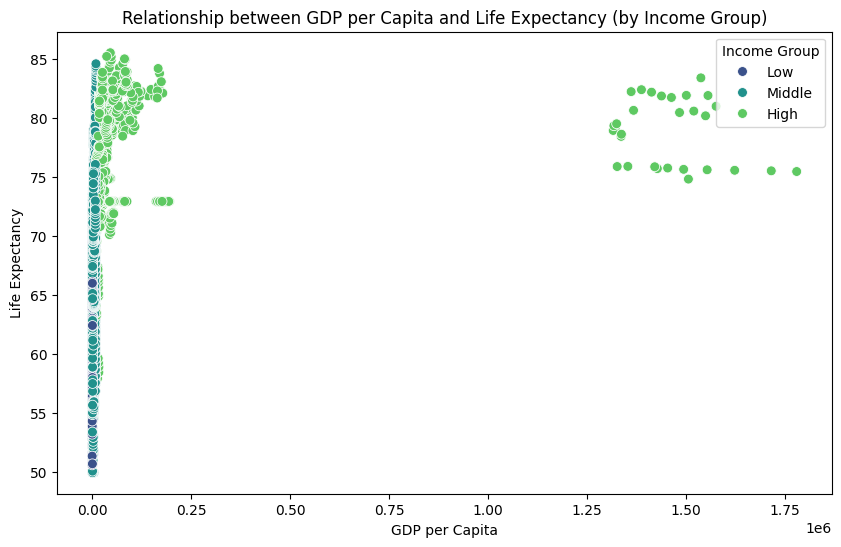

<ipython-input-7-c5e75cc94177>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income_Group', y='Life Expectancy', data=df, palette='Set2')


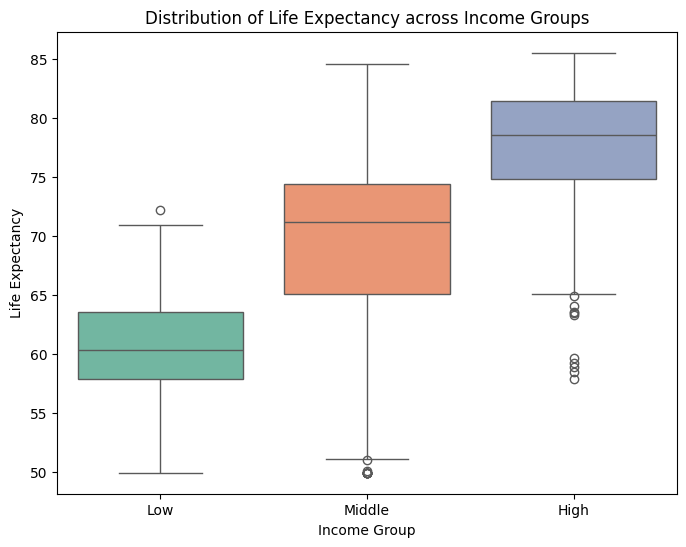

<ipython-input-7-c5e75cc94177>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Income_Group', y='Unemployment Rate (%)', data=df, palette='Set3', ci='sd')
<ipython-input-7-c5e75cc94177>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Group', y='Unemployment Rate (%)', data=df, palette='Set3', ci='sd')


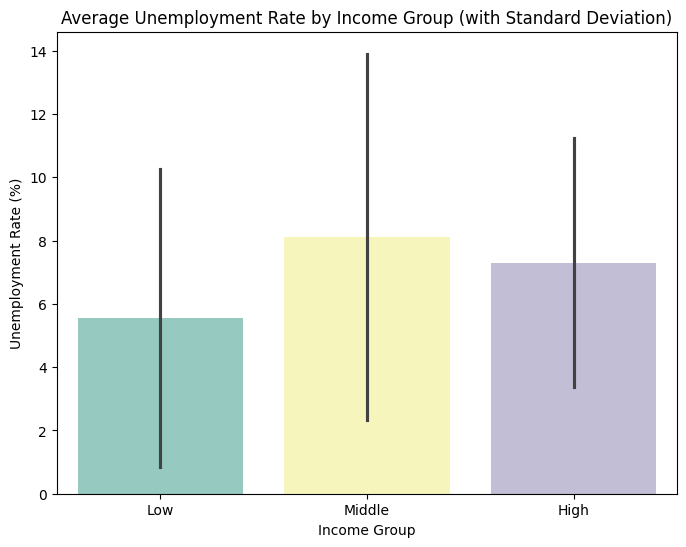

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='GDP_per_capita', y='Life Expectancy', hue='Income_Group', data=df, palette='viridis', s=50)
    plt.xlabel('GDP per Capita')
    plt.ylabel('Life Expectancy')
    plt.title('Relationship between GDP per Capita and Life Expectancy (by Income Group)')
    plt.legend(title='Income Group')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Income_Group', y='Life Expectancy', data=df, palette='Set2')
    plt.xlabel('Income Group')
    plt.ylabel('Life Expectancy')
    plt.title('Distribution of Life Expectancy across Income Groups')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Income_Group', y='Unemployment Rate (%)', data=df, palette='Set3', ci='sd')
    plt.xlabel('Income Group')
    plt.ylabel('Unemployment Rate (%)')
    plt.title('Average Unemployment Rate by Income Group (with Standard Deviation)')
    plt.show()

except Exception as e:
    print(f"An error occurred during visualization: {e}")